Ref: https://github.com/SHI-Labs/OneFormer/tree/main/datasets
```
ADEChallengeData2016/
  images/
  annotations/
  objectInfo150.txt
  # download instance annotation
  annotations_instance/
  # generated by prepare_ade20k_sem_seg.py
  annotations_detectron2/
  # below are generated by prepare_ade20k_pan_seg.py
  ade20k_panoptic_{train,val}.json
  ade20k_panoptic_{train,val}/
  # below are generated by prepare_ade20k_ins_seg.py
  ade20k_instance_{train,val}.json
```

In [ ]:
from pathlib import Path

datasets_path = Path("/content/datasets")

if datasets_path.exists():
    print(f"{datasets_path} Path exists")
else:
    print(f"{datasets_path} Path doesnt exist.. Creating One!")
    datasets_path.mkdir(parents=True, exist_ok=True)


/content/datasets Path doesnt exist.. Creating One!


In [ ]:
import os
os.environ["DETECTRON2_DATASETS"] = "/content/datasets"

In [ ]:
os.getenv("DETECTRON2_DATASETS")

'/content/datasets'

In [ ]:
##seceneparsing semantic segmentation dataset with 150 categories
# !wget -O /content/datasets/ADEChallengeData2016.zip http://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip
# !unzip /content/datasets/ADEChallengeData2016.zip -d ./datasets
# !rm /content/datasets/ADEChallengeData2016.zip
# !echo "Dataset downloaded."

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/ADEChallengeData2016/annotations/training/ADE_train_00010086.png  
  inflating: ./datasets/ADEChallengeData2016/annotations/training/ADE_train_00002526.png  
  inflating: ./datasets/ADEChallengeData2016/annotations/training/ADE_train_00002954.png  
  inflating: ./datasets/ADEChallengeData2016/annotations/training/ADE_train_00007278.png  
  inflating: ./datasets/ADEChallengeData2016/annotations/training/ADE_train_00012415.png  
  inflating: ./datasets/ADEChallengeData2016/annotations/training/ADE_train_00012867.png  
  inflating: ./datasets/ADEChallengeData2016/annotations/training/ADE_train_00000612.png  
  inflating: ./datasets/ADEChallengeData2016/annotations/training/ADE_train_00016979.png  
  inflating: ./datasets/ADEChallengeData2016/annotations/training/ADE_train_00013255.png  
  inflating: ./datasets/ADEChallengeData2016/annotations/training/ADE_train_00013980.png  
  inflating: ./datasets/ADEChallengeDat

In [ ]:
#instance annotations
# !wget -P /content/datasets/ http://sceneparsing.csail.mit.edu/data/ChallengeData2017/annotations_instance.tar

--2024-01-09 16:06:08--  http://sceneparsing.csail.mit.edu/data/ChallengeData2017/annotations_instance.tar
Resolving sceneparsing.csail.mit.edu (sceneparsing.csail.mit.edu)... 128.30.100.223
Connecting to sceneparsing.csail.mit.edu (sceneparsing.csail.mit.edu)|128.30.100.223|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90398720 (86M) [application/x-tar]
Saving to: ‘/content/datasets/annotations_instance.tar’

annotations_instanc 100%[===================>]  86.21M  23.2MB/s    in 3.8s    

2024-01-09 16:06:12 (22.6 MB/s) - ‘/content/datasets/annotations_instance.tar’ saved [90398720/90398720]



In [ ]:
import tarfile

def untar_file(tar_file_path, destination_path):
    if not destination_path.exists():
        print(f"{destination_path} doesnt exist.. Creating one")
        destination_path.mkdir(parents=True, exist_ok=True)
    with tarfile.open(tar_file_path, 'r') as tar:
        tar.extractall(destination_path)

    os.remove(tar_file_path)
# Untar annotations
tar_file_path = datasets_path / "annotations_instance.tar"
destination_path = datasets_path / "ADEChallengeData2016"

untar_file(tar_file_path, destination_path)

In [ ]:
import requests

file_path = datasets_path / "prepare_ade20k_sem_seg.py"
if file_path.is_file():
    print(f"{file_path} exists already.. Skipping download")
else:
    print(f"Could not find {file_path}.. Downloading..")
    with open(file_path, "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/SHI-Labs/OneFormer/main/datasets/prepare_ade20k_sem_seg.py")
        f.write(request.content)

Could not find /content/datasets/prepare_ade20k_sem_seg.py.. Downloading..


In [ ]:
#Generate annotations_detectron2/ folder
!python datasets/prepare_ade20k_sem_seg.py

100% 20210/20210 [02:23<00:00, 141.22it/s]
100% 2000/2000 [00:15<00:00, 132.83it/s]


In [ ]:
#Install panopticapi
!pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-c8ndbvq7
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-c8ndbvq7
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8259 sha256=3cc161e32e523501bfa0ee2edb206081f818a0681830cee5b5f89770bca279cb
  Stored in directory: /tmp/pip-ephem-wheel-cache-i8xpzyzs/wheels/70/87/ae/5c2b138c967549070e3fe35f3b5fcaf1ed56e9f5483a09ee65
Successfully built panopticapi


In [ ]:
import requests

file_path = datasets_path / "prepare_ade20k_pan_seg.py"
if file_path.is_file():
    print(f"{file_path} exists already.. Skipping download")
else:
    print(f"Could not find {file_path}.. Downloading..")
    with open(file_path, "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/SHI-Labs/OneFormer/main/datasets/prepare_ade20k_pan_seg.py")
        f.write(request.content)

Could not find /content/datasets/prepare_ade20k_pan_seg.py.. Downloading..


In [ ]:
#image details are needed to run prepare_ade20k_pan_seg.py
# ade20k_instance_imgCatIds.json - List(dict) - [{"images": [{"file_name": "ADE_train_00000001.jpg", "width": 683, "id": 0, "height": 512}, {"file_name": "ADE_train_00000002.jpg", "width": 711, "id": 1, "height": 512}..]
import requests

file_path = datasets_path / "ade20k_instance_imgCatIds.json"
if file_path.is_file():
    print(f"{file_path} exists already.. Skipping download")
else:
    print(f"Could not find {file_path}.. Downloading..")
    with open(file_path, "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/SHI-Labs/OneFormer/main/datasets/ade20k_instance_imgCatIds.json")
        f.write(request.content)

Could not find /content/datasets/ade20k_instance_imgCatIds.json.. Downloading..


In [ ]:
#instance to category ids mapping needed to run prepare_ade20k_pan_seg.py
# ade20k_instance_catid_mapping.txt - List(dict) - [{"images": [{"file_name": "ADE_train_00000001.jpg", "width": 683, "id": 0, "height": 512}, {"file_name": "ADE_train_00000002.jpg", "width": 711, "id": 1, "height": 512}..]
import requests

file_path = datasets_path / "ade20k_instance_catid_mapping.txt"
if file_path.is_file():
    print(f"{file_path} exists already.. Skipping download")
else:
    print(f"Could not find {file_path}.. Downloading..")
    with open(file_path, "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/SHI-Labs/OneFormer/main/datasets/ade20k_instance_catid_mapping.txt")
        f.write(request.content)

Could not find /content/datasets/ade20k_instance_catid_mapping.txt.. Downloading..


In [ ]:
#combine semantic annotations from annotations/ and instance annotations from annotations_instance/ for panoptic annotations.
!python datasets/prepare_ade20k_pan_seg.py

100% 20210/20210 [25:21<00:00, 13.28it/s]
Creating folder /content/datasets/ADEChallengeData2016/ade20k_panoptic_val/ for panoptic segmentation PNGs
100% 2000/2000 [02:46<00:00, 12.01it/s]


In [ ]:
import requests

file_path = datasets_path / "prepare_ade20k_ins_seg.py"
if file_path.is_file():
    print(f"{file_path} exists already.. Skipping download")
else:
    print(f"Could not find {file_path}.. Downloading..")
    with open(file_path, "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/SHI-Labs/OneFormer/main/datasets/prepare_ade20k_ins_seg.py")
        f.write(request.content)

Could not find /content/datasets/prepare_ade20k_ins_seg.py.. Downloading..


In [ ]:
#extract instance annotations in COCO format.
!python datasets/prepare_ade20k_ins_seg.py

100% 20210/20210 [10:40<00:00, 31.53it/s]
100% 2000/2000 [01:12<00:00, 27.45it/s]


In [ ]:
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the paths
source_path = '/content/datasets'  # path of directory that needs to be zipped
destination_path = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/Data/'  # destination path in google drive
zip_filename = 'ade20k' #saves the data from source path to drive path using this name

# Zip the data files
shutil.make_archive(destination_path + zip_filename, 'zip', source_path)

# Optional: If you want to remove the original files after zipping
#shutil.rmtree(source_path)

# Optional: Unmount Google Drive (if you don't need it anymore)
drive.flush_and_unmount()


Mounted at /content/drive


In [ ]:
#if you want to access that zip from drive
from google.colab import drive
import zipfile
import os
from pathlib import Path

# Mount Google Drive
drive.mount('/content/drive')

# Specify the paths
zip_filename = 'ade20k.zip'
source_path = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/Data/'  # Adjust this path

# Unzip the file
zip_file_path = os.path.join(source_path, zip_filename)
destination_path = Path('/content/datasets/')

if not destination_path.is_dir():
    destination_path = Path(destination_path)
    destination_path.mkdir(exist_ok=True, parents=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_path)

# Now you can access the files in the 'unzipped_data' folder
# For example, you can list the files in the unzipped folder
# unzipped_files = os.listdir(unzip_path)
# print("Unzipped files:", unzipped_files)

# Optional: If you want to remove the unzipped files after using them
# shutil.rmtree(unzip_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_ade20k_dataset_dict(data_root):
    #dataset_dict = {"image": [], "annotation": [], "panoptic_json": [], "split": []}
    dataset_dict = {"image": [], "annotation": [], "split": []}
    train_split_names = ["training", "validation"]
    val_split_names = ["train", "val"]

    for idx, split in enumerate(train_split_names):
        image_dir = os.path.join(data_root, "images", split)
        annotation_dir = os.path.join(data_root, f"ade20k_panoptic_{val_split_names[idx]}")

        # json_file = os.path.join(data_root, "gtFine", f"cityscapes_panoptic_{split}.json")
        # with open(json_file, "r") as json_file:
        #         json_content = json.load(json_file)
        # Iterate over cities and images in the split
        for image_file in os.listdir(image_dir):
            image_path = os.path.join(image_dir, image_file)
            annotation_file = image_file.replace(".jpg", ".png")
            annotation_path = os.path.join(annotation_dir, annotation_file)
            dataset_dict["image"].append(image_path)
            dataset_dict["annotation"].append(annotation_path)
            dataset_dict["split"].append(val_split_names[idx])
            # dataset_dict["panoptic_json"].append(json_content)
    return dataset_dict


# Create DatasetDict for Cityscapes
data_root = "/content/datasets/ADEChallengeData2016"
ade20k_dataset_dict = create_ade20k_dataset_dict(data_root)
print(np.unique(ade20k_dataset_dict["split"]))

def create_dataset(image_paths, label_paths):
    dataset = Dataset.from_dict({"image": sorted(image_paths),
                                "panoptic_mask_label": sorted(label_paths)})
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("panoptic_mask_label", Image())
    return dataset


train_dict = {k: [x for i, x in enumerate(v) if ade20k_dataset_dict['split'][i]=='train']
                                      for k, v in ade20k_dataset_dict.items()}
train_dataset = create_dataset(train_dict["image"], train_dict["annotation"])
val_dict = {k: [x for i, x in enumerate(v) if ade20k_dataset_dict['split'][i]=='val']
                                      for k, v in ade20k_dataset_dict.items()}
val_dataset = create_dataset(val_dict["image"], val_dict["annotation"])


dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
})


# Push to the Hugging Face Model Hub
#dataset.push_to_hub("BhavanaMalla/ade20k-panoptic", private=True)

['train' 'val']


Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/6737 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/68 [00:00<?, ?ba/s]

Map:   0%|          | 0/6737 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/68 [00:00<?, ?ba/s]

Map:   0%|          | 0/6736 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/68 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/476 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-panoptic/commit/ee83fd6e6e1b50609059f9bc37aadae9d3cece0a', commit_message='Upload dataset', commit_description='', oid='ee83fd6e6e1b50609059f9bc37aadae9d3cece0a', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
dataset, dataset["train"].features

(DatasetDict({
     train: Dataset({
         features: ['image', 'panoptic_mask_label'],
         num_rows: 20210
     })
     validation: Dataset({
         features: ['image', 'panoptic_mask_label'],
         num_rows: 2000
     })
 }),
 {'image': Image(decode=True, id=None),
  'panoptic_mask_label': Image(decode=True, id=None)})

In [ ]:
#commit the objectInfo150.txt
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ADEChallengeData2016/objectInfo150.txt",
    path_in_repo="objectInfo150.txt",
    repo_id="BhavanaMalla/ade20k-panoptic",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-panoptic/commit/82262dd282afddaed18a3a71df7e55bf20313615', commit_message='Upload objectInfo150.txt with huggingface_hub', commit_description='', oid='82262dd282afddaed18a3a71df7e55bf20313615', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the panoptic json files
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ADEChallengeData2016/ade20k_panoptic_train.json",
    path_in_repo="ade20k_panoptic_train.json",
    repo_id="BhavanaMalla/ade20k-panoptic",
    repo_type="dataset",
)

ade20k_panoptic_train.json:   0%|          | 0.00/28.7M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-panoptic/commit/7dc63bb0dc271290c42de02b16c6bb2bb12357c2', commit_message='Upload ade20k_panoptic_train.json with huggingface_hub', commit_description='', oid='7dc63bb0dc271290c42de02b16c6bb2bb12357c2', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the panoptic json files
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ADEChallengeData2016/ade20k_panoptic_val.json",
    path_in_repo="ade20k_panoptic_val.json",
    repo_id="BhavanaMalla/ade20k-panoptic",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-panoptic/commit/b6beb356298de0480850b538eda37305a508549f', commit_message='Upload ade20k_panoptic_val.json with huggingface_hub', commit_description='', oid='b6beb356298de0480850b538eda37305a508549f', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the scenecategory file
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ADEChallengeData2016/sceneCategories.txt",
    path_in_repo="sceneCategories.txt",
    repo_id="BhavanaMalla/ade20k-panoptic",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-panoptic/commit/53a83374fb3bbbbb733068b996b5afa028caf6aa', commit_message='Upload sceneCategories.txt with huggingface_hub', commit_description='', oid='53a83374fb3bbbbb733068b996b5afa028caf6aa', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from datasets import load_dataset

ade20k_pan_dataset = load_dataset("BhavanaMalla/ade20k-panoptic")
ade20k_pan_dataset

Generating train split:   0%|          | 0/20210 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'panoptic_mask_label'],
        num_rows: 20210
    })
    validation: Dataset({
        features: ['image', 'panoptic_mask_label'],
        num_rows: 2000
    })
})

In [ ]:
np.unique(np.array(ade20k_pan_dataset["validation"][0]["panoptic_mask_label"]))

array([  0,   3,   4,   6,   7, 120, 140, 180, 200, 204, 230, 250, 255],
      dtype=uint8)

In [ ]:
from huggingface_hub import hf_hub_download
objectInfo150 = hf_hub_download(repo_id="BhavanaMalla/ade20k-panoptic",
                                filename="objectInfo150.txt",
                                repo_type="dataset",
                                local_dir="/content")

In [ ]:
import pandas as pd
objectInfo150 = pd.read_csv("/content/objectInfo150.txt", delimiter="\t")
objectInfo150.head()

,Idx,Ratio,Train,Val,Name
0,1,0.1576,11664,1172,wall
1,2,0.1072,6046,612,"building, edifice"
2,3,0.0878,8265,796,sky
3,4,0.0621,9336,917,"floor, flooring"
4,5,0.0480,6678,641,tree


In [ ]:
from huggingface_hub import hf_hub_download
ade20k_panoptic_val_json = hf_hub_download(repo_id="BhavanaMalla/ade20k-panoptic",
                                filename="ade20k_panoptic_val.json",
                                repo_type="dataset",
                                local_dir="/content")

ade20k_panoptic_val.json:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

In [ ]:
import json
with open("/content/ade20k_panoptic_val.json", "r") as f:
    json_content = json.load(f)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
json_content.keys()

dict_keys(['images', 'annotations', 'categories'])

In [ ]:
len(json_content["images"]), json_content["images"][0]

(2000,
 {'id': 'ADE_val_00000001',
  'file_name': 'ADE_val_00000001.jpg',
  'width': 683,
  'height': 512})

In [ ]:
len(json_content["annotations"]), json_content["annotations"][0].keys(), json_content["annotations"][0]

(2000,
 dict_keys(['image_id', 'file_name', 'segments_info']),
 {'image_id': 'ADE_val_00000001',
  'file_name': 'ADE_val_00000001.png',
  'segments_info': [{'id': 7895160,
    'category_id': 0,
    'area': 14538,
    'bbox': [0, 383, 348, 52],
    'iscrowd': 0},
   {'id': 7895220,
    'category_id': 1,
    'area': 123406,
    'bbox': [166, 46, 517, 384],
    'iscrowd': 0},
   {'id': 15132166,
    'category_id': 2,
    'area': 134492,
    'bbox': [0, 0, 682, 356],
    'iscrowd': 0},
   {'id': 247812,
    'category_id': 4,
    'area': 8784,
    'bbox': [1, 308, 170, 84],
    'iscrowd': 0},
   {'id': 9211020,
    'category_id': 6,
    'area': 1755,
    'bbox': [522, 492, 160, 19],
    'iscrowd': 0},
   {'id': 522756,
    'category_id': 9,
    'area': 53099,
    'bbox': [0, 417, 682, 94],
    'iscrowd': 0},
   {'id': 327628,
    'category_id': 17,
    'area': 10009,
    'bbox': [504, 262, 177, 189],
    'iscrowd': 0}]})

In [ ]:
len(json_content["categories"]), json_content["categories"][0].keys(), json_content["categories"][0]

(150,
 dict_keys(['name', 'id', 'isthing', 'color']),
 {'name': 'wall', 'id': 0, 'isthing': 0, 'color': [120, 120, 120]})

**Send ade20k instance segmentation data to hub**

In [ ]:
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_ade20k_dataset_dict(data_root):
    #dataset_dict = {"image": [], "annotation": [], "panoptic_json": [], "split": []}
    dataset_dict = {"image": [], "annotation": [], "split": []}
    train_split_names = ["training", "validation"]

    #/content/datasets/ADEChallengeData2016/annotations_instance/validation/ADE_val_00000001.png
    #/content/datasets/ADEChallengeData2016/images/validation/ADE_val_00000001.jpg
    for idx, split in enumerate(train_split_names):
        image_dir = os.path.join(data_root, "images", split)
        annotation_dir = os.path.join(data_root, "annotations_instance", f"{split}")

        # Iterate over cities and images in the split
        for image_file in os.listdir(image_dir):
            image_path = os.path.join(image_dir, image_file)
            annotation_file = image_file.replace(".jpg", ".png")
            annotation_path = os.path.join(annotation_dir, annotation_file)
            dataset_dict["image"].append(image_path)
            dataset_dict["annotation"].append(annotation_path)
            dataset_dict["split"].append(split)
            # dataset_dict["panoptic_json"].append(json_content)
    return dataset_dict


# Create DatasetDict for Cityscapes
data_root = "/content/datasets/ADEChallengeData2016"
ade20k_dataset_dict = create_ade20k_dataset_dict(data_root)
print(np.unique(ade20k_dataset_dict["split"]))

def create_dataset(image_paths, label_paths):
    dataset = Dataset.from_dict({"image": sorted(image_paths),
                                "instance_mask_label": sorted(label_paths)})
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("instance_mask_label", Image())
    return dataset


train_dict = {k: [x for i, x in enumerate(v) if ade20k_dataset_dict['split'][i]=='training']
                                      for k, v in ade20k_dataset_dict.items()}
train_dataset = create_dataset(train_dict["image"], train_dict["annotation"])
val_dict = {k: [x for i, x in enumerate(v) if ade20k_dataset_dict['split'][i]=='validation']
                                      for k, v in ade20k_dataset_dict.items()}
val_dataset = create_dataset(val_dict["image"], val_dict["annotation"])


dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
})


# Push to the Hugging Face Model Hub
#dataset.push_to_hub("BhavanaMalla/ade20k-instance", private=True)

['training' 'validation']


Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/6737 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/68 [00:00<?, ?ba/s]

Map:   0%|          | 0/6737 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/68 [00:00<?, ?ba/s]

Map:   0%|          | 0/6736 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/68 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-instance/commit/5ad085b1022d08bf590b68a60e8b0af6f2cb7315', commit_message='Upload dataset', commit_description='', oid='5ad085b1022d08bf590b68a60e8b0af6f2cb7315', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'instance_mask_label'],
        num_rows: 20210
    })
    validation: Dataset({
        features: ['image', 'instance_mask_label'],
        num_rows: 2000
    })
})

In [ ]:
#commit the ade20k_instance_train.json file
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ADEChallengeData2016/ade20k_instance_train.json",
    path_in_repo="ade20k_instance_train.json",
    repo_id="BhavanaMalla/ade20k-instance",
    repo_type="dataset",
)

ade20k_instance_train.json:   0%|          | 0.00/84.8M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-instance/commit/540dc48f9b3894724237b77dd7071381ce0d05c1', commit_message='Upload ade20k_instance_train.json with huggingface_hub', commit_description='', oid='540dc48f9b3894724237b77dd7071381ce0d05c1', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the ade20k_instance_val.json file
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ADEChallengeData2016/ade20k_instance_val.json",
    path_in_repo="ade20k_instance_val.json",
    repo_id="BhavanaMalla/ade20k-instance",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-instance/commit/f41641dfafb1f0653cb2a7c35bf348f178b85d78', commit_message='Upload ade20k_instance_val.json with huggingface_hub', commit_description='', oid='f41641dfafb1f0653cb2a7c35bf348f178b85d78', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the objectinfo.txt file
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ADEChallengeData2016/objectInfo150.txt",
    path_in_repo="objectInfo150.txt",
    repo_id="BhavanaMalla/ade20k-instance",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-instance/commit/c6f2f3e4d69603fedf4ed08860c1add7361765cc', commit_message='Upload objectInfo150.txt with huggingface_hub', commit_description='', oid='c6f2f3e4d69603fedf4ed08860c1add7361765cc', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the sceneCategories.txt file
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ADEChallengeData2016/sceneCategories.txt",
    path_in_repo="sceneCategories.txt",
    repo_id="BhavanaMalla/ade20k-instance",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-instance/commit/83b066d6a23b99c5408f027f844a89503c01ad4e', commit_message='Upload sceneCategories.txt with huggingface_hub', commit_description='', oid='83b066d6a23b99c5408f027f844a89503c01ad4e', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the ade20k_instance_imgCatIds.json file
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ade20k_instance_imgCatIds.json",
    path_in_repo="ade20k_instance_imgCatIds.json",
    repo_id="BhavanaMalla/ade20k-instance",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-instance/commit/15007f6c235ec8bd722fabcefc5e0d9e64cdf98d', commit_message='Upload ade20k_instance_imgCatIds.json with huggingface_hub', commit_description='', oid='15007f6c235ec8bd722fabcefc5e0d9e64cdf98d', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the ade20k_instance_catid_mapping.txt file
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ade20k_instance_catid_mapping.txt",
    path_in_repo="ade20k_instance_catid_mapping.txt",
    repo_id="BhavanaMalla/ade20k-instance",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-instance/commit/986eb695e49da6bf67618a0142c434a440bcf87b', commit_message='Upload ade20k_instance_catid_mapping.txt with huggingface_hub', commit_description='', oid='986eb695e49da6bf67618a0142c434a440bcf87b', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from datasets import load_dataset

ade20k_instance_val = load_dataset("BhavanaMalla/ade20k-instance", split="validation[:10]")

Generating train split:   0%|          | 0/20210 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
ade20k_instance_val

Dataset({
    features: ['image', 'instance_mask_label'],
    num_rows: 10
})

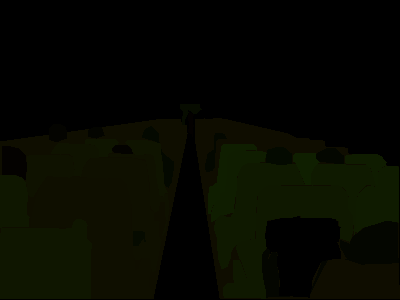

In [ ]:
ade20k_instance_val[4]["instance_mask_label"]

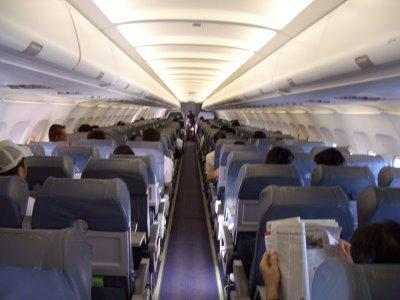

In [ ]:
ade20k_instance_val[4]["image"]

**commit the ade20k semantic segmentation data to hub**

In [ ]:
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_ade20k_dataset_dict(data_root):
    #dataset_dict = {"image": [], "annotation": [], "panoptic_json": [], "split": []}
    dataset_dict = {"image": [], "annotation": [], "split": []}
    train_split_names = ["training", "validation"]

    #/content/datasets/ADEChallengeData2016/annotations_detectron2/validation/ADE_val_00000001.png
    #/content/datasets/ADEChallengeData2016/images/validation/ADE_val_00000001.jpg
    for idx, split in enumerate(train_split_names):
        image_dir = os.path.join(data_root, "images", split)
        annotation_dir = os.path.join(data_root, "annotations_detectron2", f"{split}")

        # Iterate over cities and images in the split
        for image_file in os.listdir(image_dir):
            image_path = os.path.join(image_dir, image_file)
            annotation_file = image_file.replace(".jpg", ".png")
            annotation_path = os.path.join(annotation_dir, annotation_file)
            dataset_dict["image"].append(image_path)
            dataset_dict["annotation"].append(annotation_path)
            dataset_dict["split"].append(split)
            # dataset_dict["panoptic_json"].append(json_content)
    return dataset_dict


# Create DatasetDict for Cityscapes
data_root = "/content/datasets/ADEChallengeData2016"
ade20k_dataset_dict = create_ade20k_dataset_dict(data_root)
print(np.unique(ade20k_dataset_dict["split"]))

def create_dataset(image_paths, label_paths):
    dataset = Dataset.from_dict({"image": sorted(image_paths),
                                "semantic_mask_label": sorted(label_paths)})
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("semantic_mask_label", Image())
    return dataset


train_dict = {k: [x for i, x in enumerate(v) if ade20k_dataset_dict['split'][i]=='training']
                                      for k, v in ade20k_dataset_dict.items()}
train_dataset = create_dataset(train_dict["image"], train_dict["annotation"])
val_dict = {k: [x for i, x in enumerate(v) if ade20k_dataset_dict['split'][i]=='validation']
                                      for k, v in ade20k_dataset_dict.items()}
val_dataset = create_dataset(val_dict["image"], val_dict["annotation"])


dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
})


# Push to the Hugging Face Model Hub
#dataset.push_to_hub("BhavanaMalla/ade20k-semantic", private=True)

['training' 'validation']


Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/6737 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/68 [00:00<?, ?ba/s]

Map:   0%|          | 0/6737 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/68 [00:00<?, ?ba/s]

Map:   0%|          | 0/6736 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/68 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-semantic/commit/975f0f7127ec892825fa5f6693b11010ab9aeb93', commit_message='Upload dataset', commit_description='', oid='975f0f7127ec892825fa5f6693b11010ab9aeb93', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the objectinfo.txt file
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ADEChallengeData2016/objectInfo150.txt",
    path_in_repo="objectInfo150.txt",
    repo_id="BhavanaMalla/ade20k-semantic",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-semantic/commit/c2130b14375a28c014259f600cd73a9f5b4e24ce', commit_message='Upload objectInfo150.txt with huggingface_hub', commit_description='', oid='c2130b14375a28c014259f600cd73a9f5b4e24ce', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#commit the sceneCategories.txt file
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/datasets/ADEChallengeData2016/sceneCategories.txt",
    path_in_repo="sceneCategories.txt",
    repo_id="BhavanaMalla/ade20k-semantic",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/ade20k-semantic/commit/2f6429d464debe45309639862673a71f8f58b99b', commit_message='Upload sceneCategories.txt with huggingface_hub', commit_description='', oid='2f6429d464debe45309639862673a71f8f58b99b', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from datasets import load_dataset

ade20k_semantic_val = load_dataset("BhavanaMalla/ade20k-semantic", split="validation[:10]")

Generating train split:   0%|          | 0/20210 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

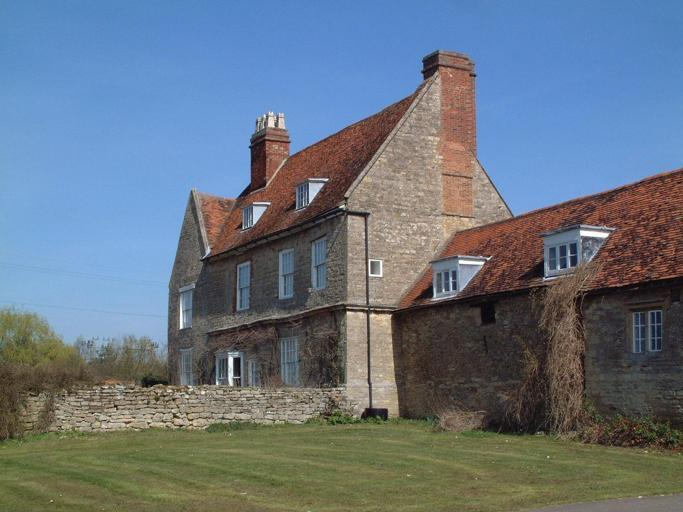

In [ ]:
ade20k_semantic_val[1]["image"]

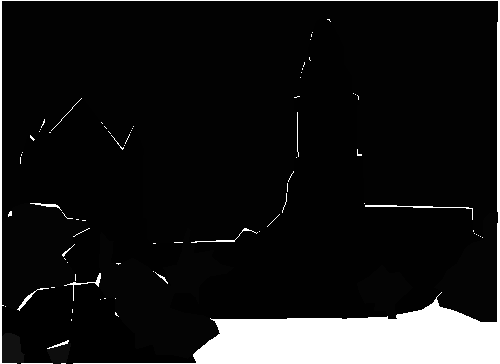

In [ ]:
ade20k_semantic_val[1]["semantic_mask_label"]

In [ ]:
import numpy as np
np.unique(np.array(ade20k_semantic_val[1]["semantic_mask_label"])), np.array(ade20k_semantic_val[1]["semantic_mask_label"]).shape

(array([  0,   1,   2,   4,  13,  17, 255], dtype=uint8), (364, 500))